## Statystyka i Analiza danych
# Zadanie domowe
Jakub Kaczmarek

### Opis zbioru danych
Dane pochodzę ze strony https://www.openintro.org/data/index.php?data=murders. Dokładnego źródła nie podano. Zawierają one informacje o 20 obszarach metropolitalnych tzn. ich populację, procent ubóstwa, procent bezrobocia oraz wskaźnik zabójstw podany w rocznej ilości morderstw na 1 mln mieszkańców. Są to dane obserwacyjne.

### Wyniki analizy eksploracyjnej

In [1]:
#przygotowanie danych
murders <- read.csv(url("https://www.openintro.org/data/csv/murders.csv"), sep=",")
#wstępny podgląd danych
head(murders)

,population,perc_pov,perc_unemp,annual_murders_per_mil
,<int>,<dbl>,<dbl>,<dbl>
1,587000,16.5,6.2,11.2
2,643000,20.5,6.4,13.4
3,635000,26.3,9.3,40.7
4,692000,16.5,5.3,5.3
5,1248000,19.2,7.3,24.8
6,643000,16.5,5.9,12.7


Dane składają się z ramki zawierającej 4 kolumny: populacja, procent ubóstwa, procent bezrobocia oraz wskaźnik zabójstw.

In [2]:
summary(murders)
sprintf("Procent ubóstwa | wariancja %f | odchylenie std.: %f", var(murders$perc_pov), sd(murders$perc_pov))
sprintf("Procent bezrobocia | wariancja %f | odchylenie std.: %f", var(murders$perc_unemp), sd(murders$perc_unemp))
sprintf("Wskaźnik zabósjtw | wariancja %f | odchylenie std.: %f", var(murders$annual_murders_per_mil), sd(murders$annual_murders_per_mil))

   population         perc_pov       perc_unemp    annual_murders_per_mil
 Min.   : 587000   Min.   :14.30   Min.   :4.900   Min.   : 5.30         
 1st Qu.: 643000   1st Qu.:17.12   1st Qu.:6.150   1st Qu.:13.22         
 Median : 745000   Median :19.15   Median :6.600   Median :19.50         
 Mean   :1433000   Mean   :19.72   Mean   :6.935   Mean   :20.57         
 3rd Qu.:1318750   3rd Qu.:21.57   3rd Qu.:7.775   3rd Qu.:26.07         
 Max.   :7895000   Max.   :26.30   Max.   :9.300   Max.   :40.70         

[1] "Procent ubóstwa | wariancja 10.512211 | odchylenie std.: 3.242254"

[1] "Procent bezrobocia | wariancja 1.457132 | odchylenie std.: 1.207117"

[1] "Wskaźnik zabósjtw | wariancja 97.642211 | odchylenie std.: 9.881407"

Ponieważ są to dane liczbowe, to zasadne jest użycie funkcji summary, która oblicza dla poszczególnych kolumn podstawowe statystyki opisowe takie jak np. mediana, średnia lub wartość minimalną/maksymalną. Dane są dosyć zróżnicowane. W przypadku populacji, badane metropolie mają rozmar od około 587 tys. do aż 7.9 mln mieszkańców. Warto jeszcze zwrócić uwagę na wskaźnik samobójstw, który jest z szerokiego przedziału od 5 do 40 zabójstw rocznie.

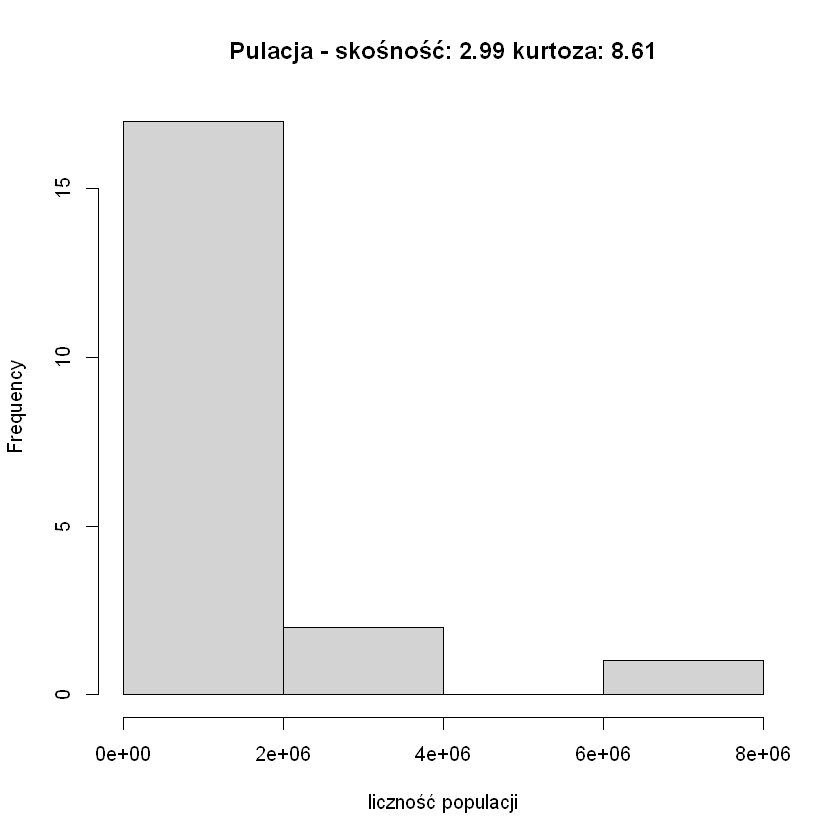

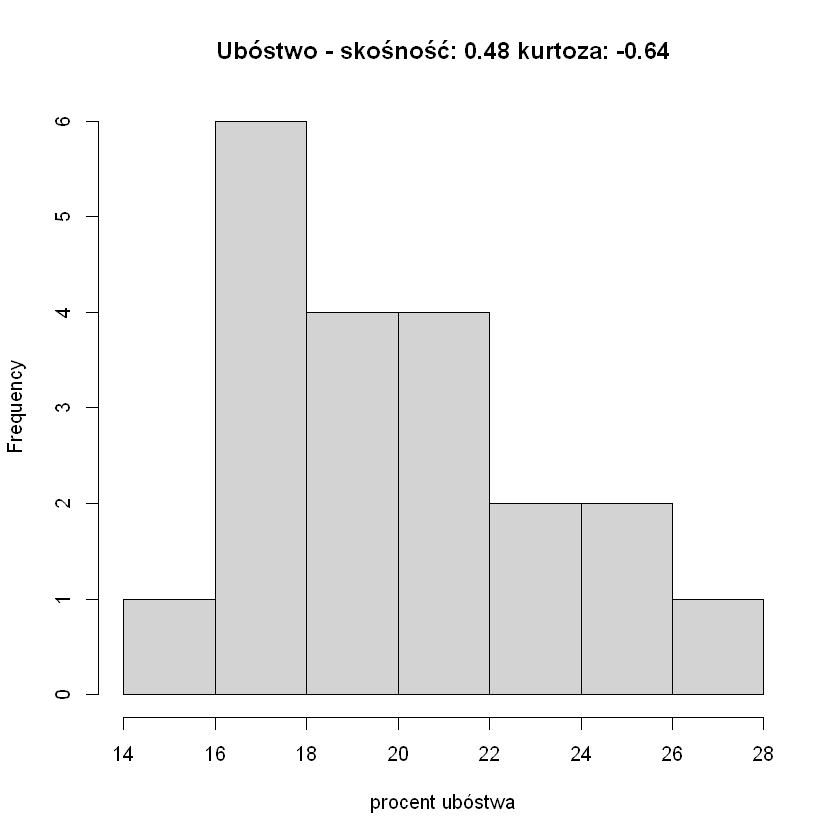

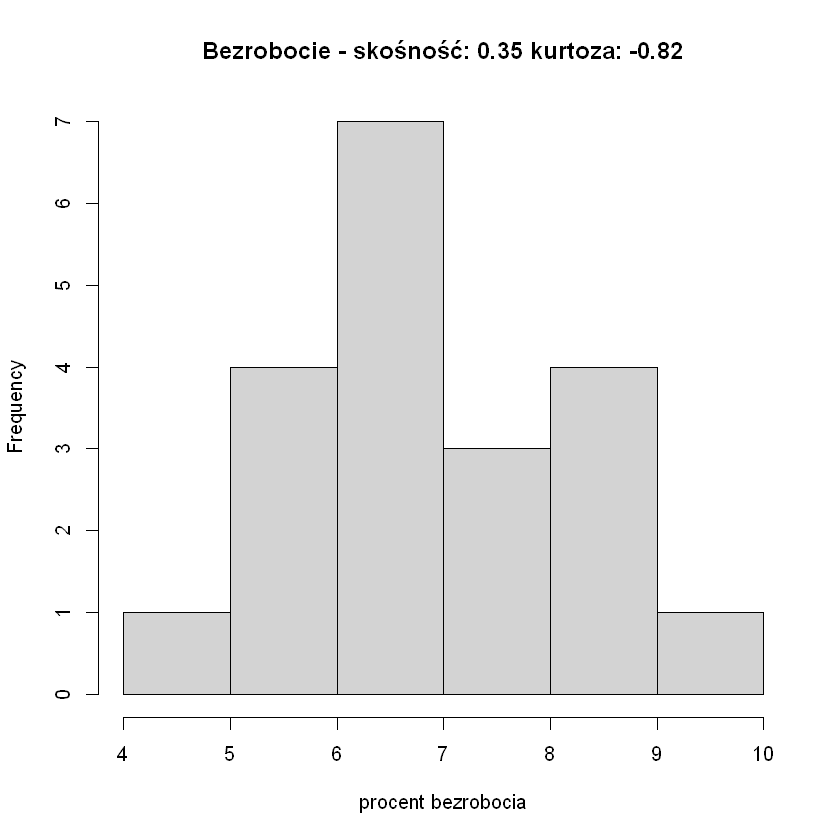

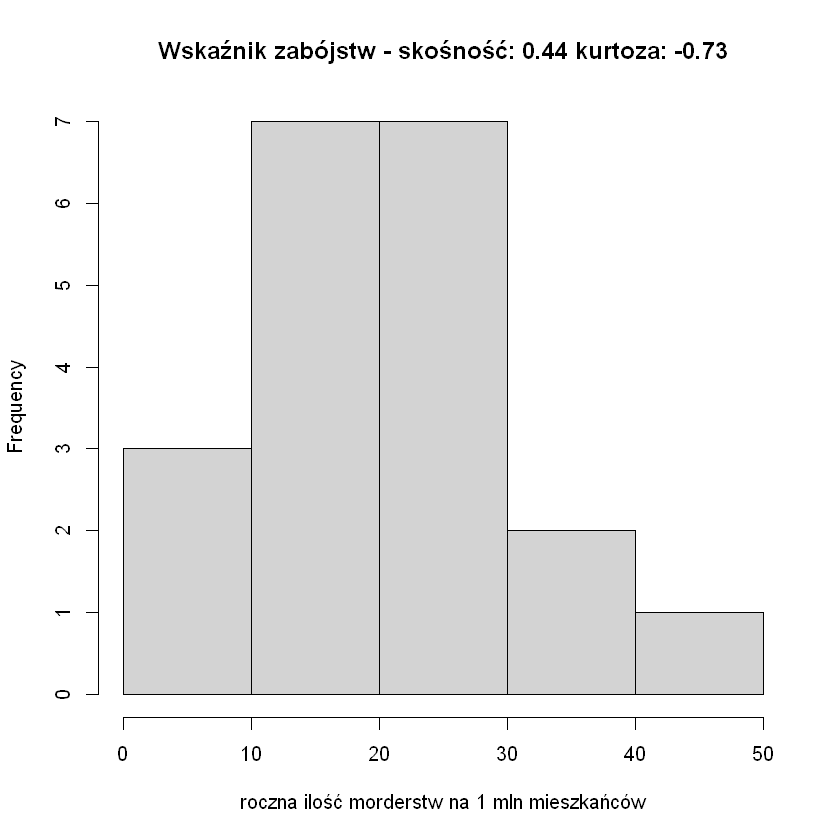

In [3]:
#liczba klas
n = ceiling(sqrt(20))

moment <- function(dane, k){
    mean((dane-mean(dane))^k)
}

my_skewness <- function(dane){
    moment(dane, 3) / moment(dane, 2)^(3/2)
}

my_kurtosis <- function(dane){
    moment(dane, 4) / moment(dane,2)^2 - 3
}


hist(murders$population, breaks = n, xlab = "liczność populacji", main = sprintf("%s skośność: %.2f kurtoza: %.2f", "Pulacja -", my_skewness(murders$population), my_kurtosis(murders$population)))
hist(murders$perc_pov, breaks = n, xlab = "procent ubóstwa", main = sprintf("%s skośność: %.2f kurtoza: %.2f", "Ubóstwo -", my_skewness(murders$perc_pov), my_kurtosis(murders$perc_pov)))
hist(murders$perc_unemp, breaks = n, xlab = "procent bezrobocia", main = sprintf("%s skośność: %.2f kurtoza: %.2f", "Bezrobocie -", my_skewness(murders$perc_unemp), my_kurtosis(murders$perc_unemp)))
hist(murders$annual_murders_per_mil, xlab = "roczna ilość morderstw na 1 mln mieszkańców", breaks = n, main = sprintf("%s skośność: %.2f kurtoza: %.2f", "Wskaźnik zabójstw -", my_skewness(murders$annual_murders_per_mil), my_kurtosis(murders$annual_murders_per_mil)))

W przypadku pierwszego wykresu można zaobserwowac outlier (wartość odstającą), zatem w przypadku populacji średnia może niezbyt prezyjnie odzwierciedlać dane (jest wrażliwa na dane odstające). Znacznie lepiej sprawdza się tutaj mediana. Patrząc na następne 3 wykresy, można stwierdzić że znacznie bardziej przypominają rozkład normalny - zarówno średnia jak i mediana dobrze się sprawdza jako miara tendencji centralnej. Pierwszy wykres ma rozkład leptokurtyczny, pozostałe platokurtyczny. Wszystkie rozkłady mają rozkład prawoskośny o czym świadczy wyliczona skośność.

In [4]:
print("Populacja")
table(cut(murders$population, breaks = n))
print("Procent ubóstwa")
table(cut(murders$perc_pov, breaks = n))
print("Procent procent bezrobocia")
table(cut(murders$perc_unemp, breaks = n))
print("Roczna ilość zabójstw na 1 mln mieszkańców")
table(cut(murders$annual_murders_per_mil, breaks = n))

[1] "Populacja"



 (5.8e+05,2.05e+06] (2.05e+06,3.51e+06] (3.51e+06,4.97e+06] (4.97e+06,6.43e+06] 
                 17                   2                   0                   0 
 (6.43e+06,7.9e+06] 
                  1 

[1] "Procent ubóstwa"



(14.3,16.7] (16.7,19.1] (19.1,21.5] (21.5,23.9] (23.9,26.3] 
          4           6           5           2           3 

[1] "Procent procent bezrobocia"



 (4.9,5.78] (5.78,6.66] (6.66,7.54] (7.54,8.42]  (8.42,9.3] 
          2           8           4           3           3 

[1] "Roczna ilość zabójstw na 1 mln mieszkańców"



(5.26,12.4] (12.4,19.5] (19.5,26.5] (26.5,33.6] (33.6,40.7] 
          4           6           5           2           3 

Dodatkowe szeregi rozdzielcze. Ponieważ dane są mocno zróżnicowane i dotyczą zupełnie innych rzeczy, o wiele łatwiej jest zinterpretować histogramy.

### Model regresji wielorakiej oraz test na jej istotność
Badaną zmienną objaśnianą będzie wskaźnik morderstw, natomiast pozostałe zmienne będą zmiennymi objaśniającymi. 

In [5]:
model <- lm(annual_murders_per_mil ~ ., murders) #model regresji
model #wyświetlenie poszczególnych współczynników


Call:
lm(formula = annual_murders_per_mil ~ ., data = murders)

Coefficients:
(Intercept)   population     perc_pov   perc_unemp  
 -3.676e+01    7.629e-07    1.192e+00    4.720e+00  


Wyświetlone zostały współczynniki dla poszczególnych zmiennych niezależnych modelu regresji. Ważne będzie jeszcze przeprowadzenie globalnego testu na istotność regresji wielorakiej. Wykonany zostanie test F.

Układ hipotez: 
$H_0: \beta_1 = \beta_2 = \beta_3 = 0$
$H_1:$ Co najmniej jeden $\beta_i \neq 0$

In [6]:
summary(model)


Call:
lm(formula = annual_murders_per_mil ~ ., data = murders)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7174 -3.3233  0.4031  1.7684 10.0329 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.676e+01  7.011e+00  -5.244 8.03e-05 ***
population   7.629e-07  6.363e-07   1.199  0.24798    
perc_pov     1.192e+00  5.617e-01   2.123  0.04974 *  
perc_unemp   4.720e+00  1.530e+00   3.084  0.00712 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.59 on 16 degrees of freedom
Multiple R-squared:  0.8183,	Adjusted R-squared:  0.7843 
F-statistic: 24.02 on 3 and 16 DF,  p-value: 3.629e-06


Przyjmując poziom istności alfa = 0.05, test F jest istotny statystycznie (p-wartość = 3.629e-06 < 0.05). Dodatkowo, analizując poszczególne zmienne w teście T dla pojedyńczych parametrów (test pojedyńczego parametru w regresji wielorakiej - $H_0: \beta_i = 0$ $H_1: \beta_i \neq 0$), okazało się że zmienna population nie jest istotna statystycznie (p-wartość = 0.24798 > 0.05). Zatem można odrzucić tą zmienną i dokonać ponownie analizy regresji wielorakiej.

In [7]:
model_v2 <- lm(annual_murders_per_mil ~ perc_pov + perc_unemp, murders)
model_v2


Call:
lm(formula = annual_murders_per_mil ~ perc_pov + perc_unemp, 
    data = murders)

Coefficients:
(Intercept)     perc_pov   perc_unemp  
    -34.073        1.224        4.399  


In [8]:
summary(model_v2)


Call:
lm(formula = annual_murders_per_mil ~ perc_pov + perc_unemp, 
    data = murders)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9019 -2.8101  0.1569  1.7788 10.2709 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -34.0725     6.7265  -5.065 9.56e-05 ***
perc_pov      1.2239     0.5682   2.154   0.0459 *  
perc_unemp    4.3989     1.5262   2.882   0.0103 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.648 on 17 degrees of freedom
Multiple R-squared:  0.802,	Adjusted R-squared:  0.7787 
F-statistic: 34.43 on 2 and 17 DF,  p-value: 1.051e-06


Poprawiony model regresji wielorakiej objaśnia około 80.2% zmienności zmiennej zależnej (wskaźnik zabójstw). Pogorszył się on w stosunku do poprzedniego modelu; jak również skorygowany współczynnik determinacji zmniejszył się z 78.43% do 77.87%.

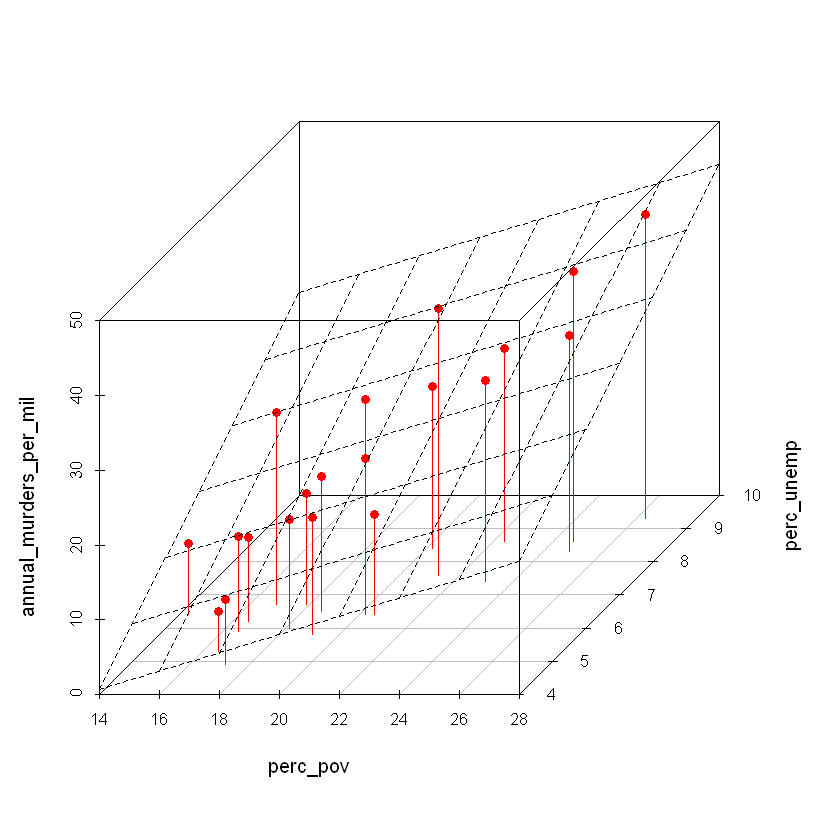

In [9]:
library("scatterplot3d")
s3d <- scatterplot3d(murders[,2:4], type = "h", color = "red", angle = 40, pch = 16)
my.lm <- lm(annual_murders_per_mil ~ perc_pov + perc_unemp, murders)
s3d$plane3d(my.lm)

Ponieważ finalny model regresji wielorakiej jest funkcją 2 zmiennych, możliwe było wykonanie wykresu 3D zaobserwowanych danych oraz funkcji modelu regresji. Analizując wykres oraz współczynniki modelu regresji można dojść do wniosku, że im wyższy procent ubóstwa i bezrobocia, tym większy wskaźnik zabójstw w metropolii.

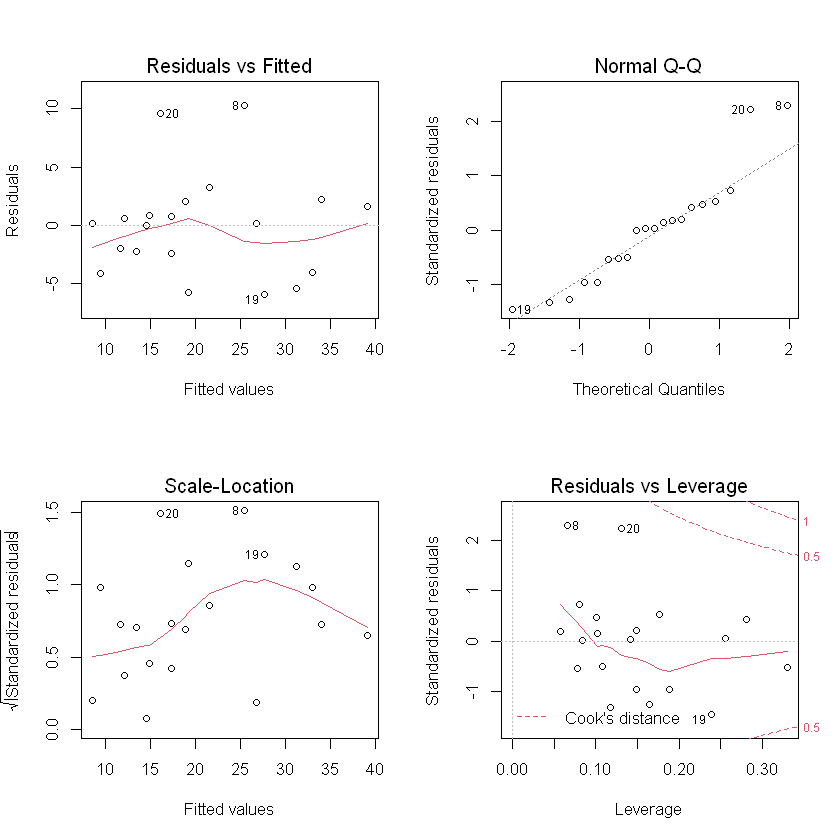

In [10]:
par(mfrow=c(2,2))
plot(model_v2)

Wyświetlone wykresy diagnostyczne służą do analizy reszt modelu regresji. Z pierwszego wykresu można wywnioskować że wartość oczekiwana reszt jest w pobliżu 0, a także reszty są rozmieszczone równormiernie (nie można dostrzec żadnego wzoru np. paraboli), więc nie występuje tu nieliniowa relacja. Na wykresie QQ punkty są blisko linii, zatem błędy pochodzą z rozkładu normalnego (pomimo że można zauwazyć kilka obserwacji odstających np. 20 i 8). Z ostatniego wykresu można wywnioskować, że nie ma żadnych obserwacji znacząco wpływających na model regresji (nie ma obserwacji za przerywanymi liniami).